In [1]:
# importing libraries
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
dfba=pd.read_excel(r"E:\LLM_R\rerawdata\Bard_MCT_Score.xls")
dfbi=pd.read_excel(r"E:\LLM_R\rerawdata\Bing_MCT_Score.xls")
dfcg=pd.read_excel(r"E:\LLM_R\rerawdata\ChatGPT_MCT_Score.xls")
dfhum=pd.read_csv(r"E:\LLM_R\MCT Excel (1).csv")


In [3]:
df1=dfba[["Bard","C_INDEX"]]
df2=dfbi[["Bing","C_INDEX"]]
df3=dfcg[["Chatgpt",'C_INDEX']]
df4=dfhum[["Human","C_INDEX"]]
df1.rename(columns={'Bard':'Participant'},inplace= True)
df2.rename(columns={'Bing':'Participant'},inplace= True)
df3.rename(columns={'Chatgpt':'Participant'},inplace= True)
df4.rename(columns={'Human':'Participant'},inplace= True)

C:\Users\sraja\AppData\Local\Temp\ipykernel_6528\889391378.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Bard':'Participant'},inplace= True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_6528\889391378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Bing':'Participant'},inplace= True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_6528\889391378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [4]:
df1.describe()

,C_INDEX
count,53.000000
mean,12.778021
std,8.253099
min,1.392758
25%,5.900151
50%,11.502783
75%,19.309262
max,32.892562


,C_INDEX
count,53.000000
mean,12.778021
std,8.253099
min,1.392758
25%,5.900151
50%,11.502783
75%,19.309262
max,32.892562


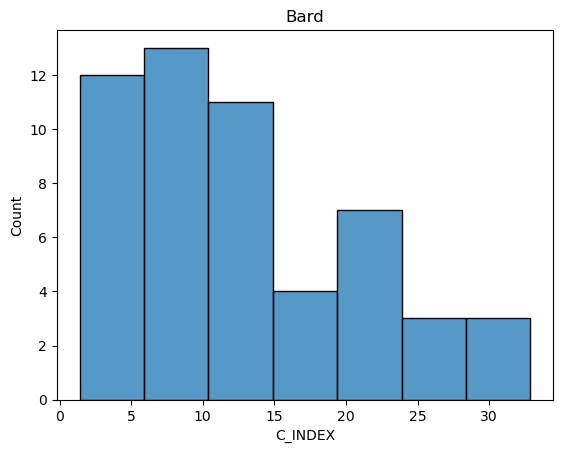

In [5]:

BA=sns.histplot(x=df1['C_INDEX'])
BA.set_title("Bard")
df1.describe()

,C_INDEX
count,53.000000
mean,12.409941
std,7.341474
min,1.947149
25%,6.608696
50%,11.315647
75%,15.939597
max,37.931034


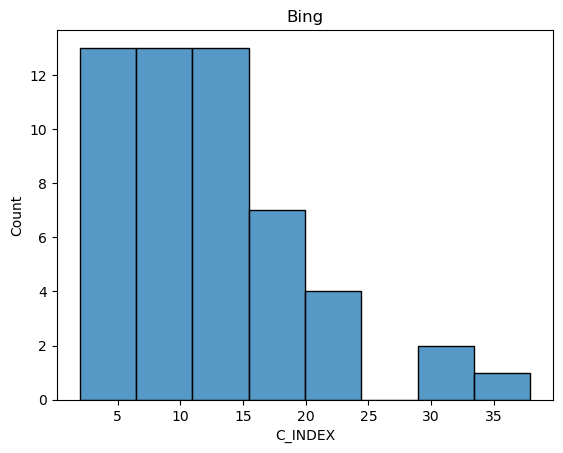

In [7]:
BI=sns.histplot(x=df2['C_INDEX'])
BI.set_title("Bing")
df2.describe()

,C_INDEX
count,53.000000
mean,9.055722
std,8.540141
min,0.320718
25%,2.977554
50%,6.463878
75%,11.866581
max,35.593220


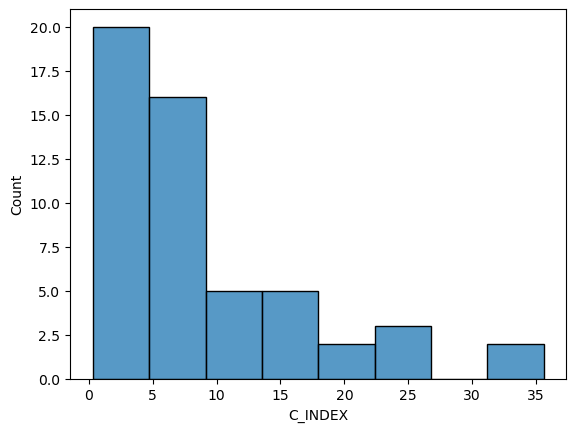

In [8]:
sns.histplot(x=df3['C_INDEX'])
df3.describe()

,C_INDEX
count,53.000000
mean,16.742200
std,9.016580
min,2.467811
25%,9.684685
50%,15.208614
75%,22.560976
max,43.030303


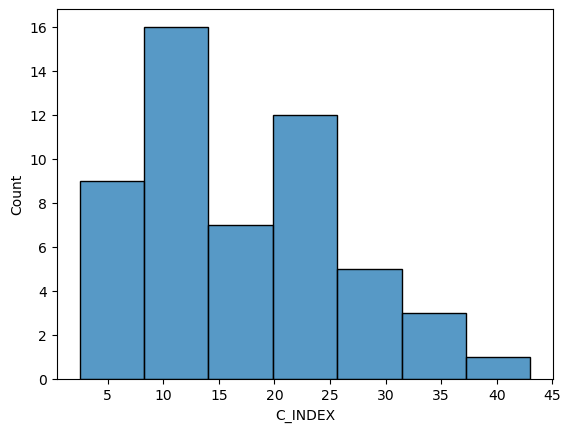

In [9]:
sns.histplot(x=df4['C_INDEX'])
df4.describe()

In [10]:
df1=df1.append(df2,ignore_index=True)
df1=df1.append(df3,ignore_index=True)
df1=df1.append(df4,ignore_index=True)



C:\Users\sraja\AppData\Local\Temp\ipykernel_7804\2628644432.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df2,ignore_index=True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_7804\2628644432.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df3,ignore_index=True)
C:\Users\sraja\AppData\Local\Temp\ipykernel_7804\2628644432.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df4,ignore_index=True)


In [11]:
df1

,Participant,C_INDEX
0,Bard,1.392758
1,Bard,3.712164
2,Bard,4.582210
3,Bard,3.150751
4,Bard,5.985915
...,...,...
207,Human,12.163417
208,Human,13.445378
209,Human,20.684292
210,Human,12.447886


<AxesSubplot:title={'center':'C_INDEX'}, xlabel='Participant'>

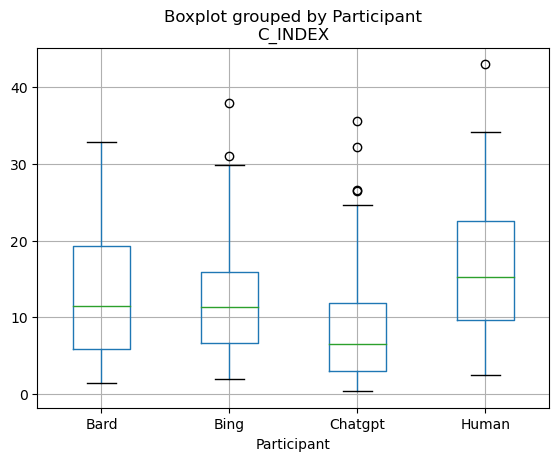

In [12]:
df1.boxplot(by ='Participant', column =['C_INDEX']) 

<AxesSubplot:xlabel='Participant', ylabel='C_INDEX'>

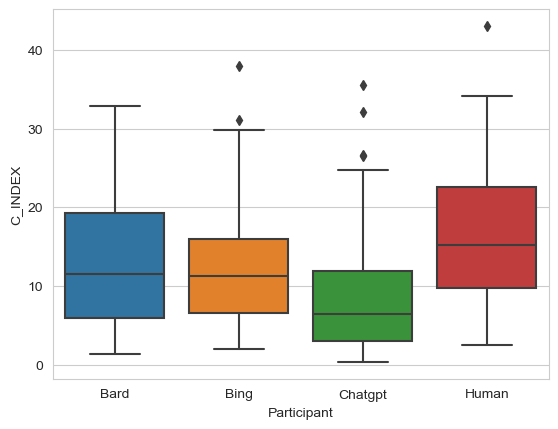

In [13]:
sns.set_style('whitegrid')
sns.boxplot(x='Participant',y='C_INDEX',data=df1)

In [16]:
df1=df1.replace("Bard",1)
df1=df1.replace("Bing",2)
df1=df1.replace("Chatgpt",3)
df1=df1.replace("Human",4)

In [17]:
model=ols('C_INDEX ~ C(Participant)',data=df1).fit()
aov_table=sm.stats.anova_lm(model,type=2)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Participant),3.0,1574.191396,524.730465,7.598083,0.000076
Residual,208.0,14364.666963,69.060899,NaN,NaN


In [18]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Participant),1574.191396,3.0,524.730465,7.598083,0.000076,0.098764,0.085396
Residual,14364.666963,208.0,69.060899,NaN,NaN,NaN,NaN


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
comp = MultiComparison(df1['C_INDEX'], df1['Participant'])
post_hoc_res = comp.tukeyhsd(0.05)
post_hoc_res.summary() 

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.3681,0.9958,-4.5491,3.8129,False
1,3,-3.7223,0.1,-7.9033,0.4587,False
1,4,3.9642,0.0701,-0.2168,8.1452,False
2,3,-3.3542,0.1638,-7.5352,0.8268,False
2,4,4.3323,0.0391,0.1513,8.5133,True
3,4,7.6865,0.0,3.5055,11.8675,True


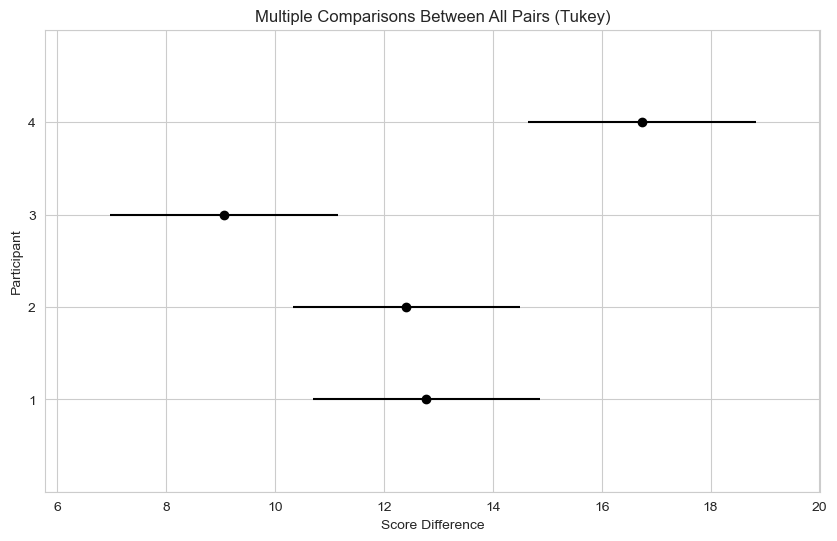

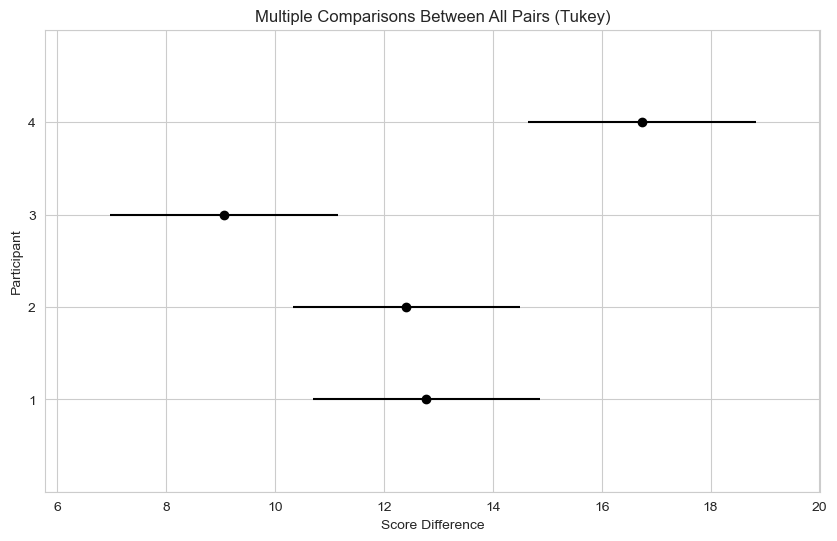

In [22]:
post_hoc_res.plot_simultaneous(ylabel= "Participant", xlabel= "Score Difference")